# ***Data Cleaning***

In [1]:
import numpy as np
import pandas as pd

In [2]:
sales_data = pd.read_excel("/content/SalesData.xlsx")

In [3]:
sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [4]:
# Display MISSING values
sales_data.isna()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10191,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Check MISSING values
sales_data.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country/Region,0
City,0


In [6]:
# Drop rows with MISSING values
sales_data_cleaned = sales_data.dropna()

# OR fill MISSING values with mean for numeric columns
sales_data_filled = sales_data.fillna(sales_data.mean(numeric_only=True))

In [9]:
# Count the number of DUPLICATE rows
sales_data.duplicated().sum()

0

In [10]:
# Remove DUPLICATEs
sales_data_cleaned = sales_data_cleaned.drop_duplicates()

In [11]:
# # Convert a specific column to datetime
# sales_data_cleaned['Date_Column'] = pd.to_datetime(sales_data_cleaned['Date_Column'], errors='coerce')

In [12]:
# # Example of detecting outliers using the interquartile range (IQR)
# Q1 = sales_data_cleaned['Sales_Amount'].quantile(0.25)
# Q3 = sales_data_cleaned['Sales_Amount'].quantile(0.75)
# IQR = Q3 - Q1

# # Define acceptable range
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out the outliers
# sales_data_cleaned = sales_data_cleaned[(sales_data_cleaned['Sales_Amount'] >= lower_bound) &
#                                         (sales_data_cleaned['Sales_Amount'] <= upper_bound)]

In [13]:
# # Example of currency conversion (assuming USD to EUR with a conversion rate)
# conversion_rate = 0.85
# sales_data_cleaned['Sales_Amount_EUR'] = sales_data_cleaned['Sales_Amount'] * conversion_rate

In [14]:
# Save the cleaned data to a new Excel file
cleaned_file_path = '/content/Cleaned_SalesData.xlsx'
sales_data_cleaned.to_excel(cleaned_file_path, index=False)

# ***EDA(Exploratory Data Analysis)***

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned Excel file
file_path = '/content/Cleaned_SalesData.xlsx'
sales_data = pd.read_excel(file_path)

In [17]:
# Descriptive statistics for numerical columns
print(sales_data.describe())

# Summary for categorical columns
print(sales_data.describe(include=['object']))

             Row ID                     Order Date  \
count  10194.000000                          10194   
mean    5097.500000  2021-04-29 11:48:25.002942976   
min        1.000000            2019-01-03 00:00:00   
25%     2549.250000            2020-05-14 00:00:00   
50%     5097.500000            2021-06-25 00:00:00   
75%     7645.750000            2022-05-14 00:00:00   
max    10194.000000            2022-12-30 00:00:00   
std     2942.898656                            NaN   

                           Ship Date         Sales      Quantity  \
count                          10194  10194.000000  10194.000000   
mean   2021-05-03 10:52:45.626839296    228.225854      3.791838   
min              2019-01-07 00:00:00      0.444000      1.000000   
25%              2020-05-19 00:00:00     17.220000      2.000000   
50%              2021-06-28 00:00:00     53.910000      3.000000   
75%              2022-05-18 00:00:00    209.500000      5.000000   
max              2023-01-05 00:00:00 

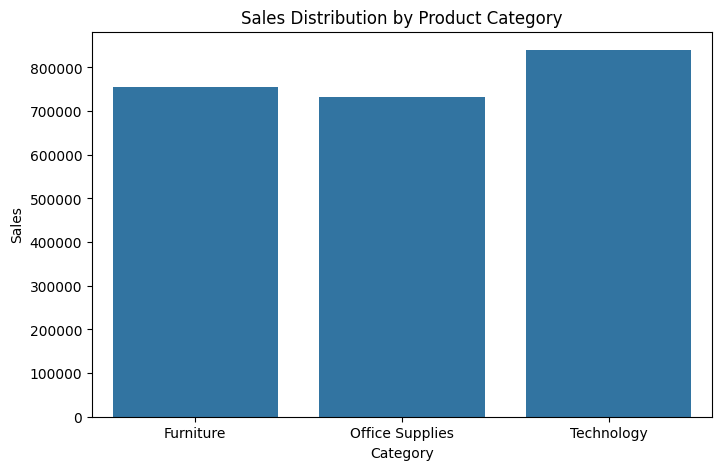

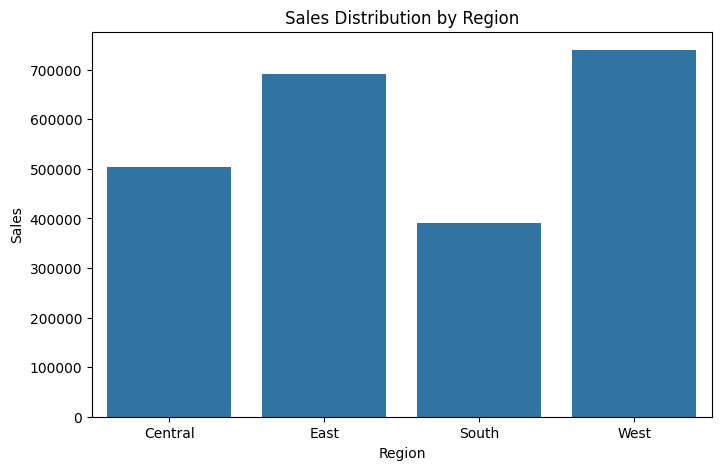

In [18]:
# Sales by product category
sales_by_category = sales_data.groupby('Category')['Sales'].sum().reset_index()

# Plot sales by category
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Sales', data=sales_by_category)
plt.title('Sales Distribution by Product Category')
plt.show()

# Sales by region
sales_by_region = sales_data.groupby('Region')['Sales'].sum().reset_index()

# Plot sales by region
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Sales', data=sales_by_region)
plt.title('Sales Distribution by Region')
plt.show()

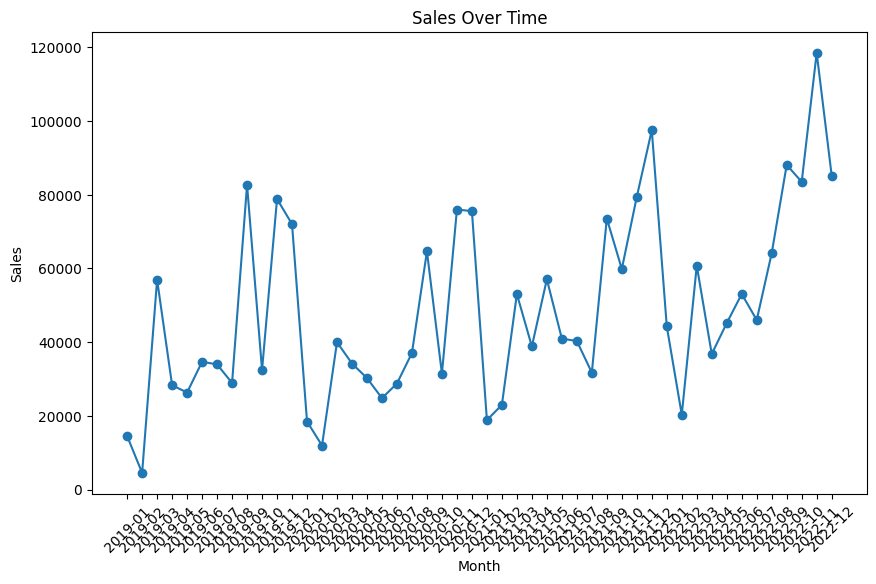

In [19]:
# Convert 'Order Date' to datetime
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Group by month and year
sales_by_month = sales_data.groupby(sales_data['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()

# Plot sales over time
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month['Order Date'].astype(str), sales_by_month['Sales'], marker='o')
plt.xticks(rotation=45)
plt.title('Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

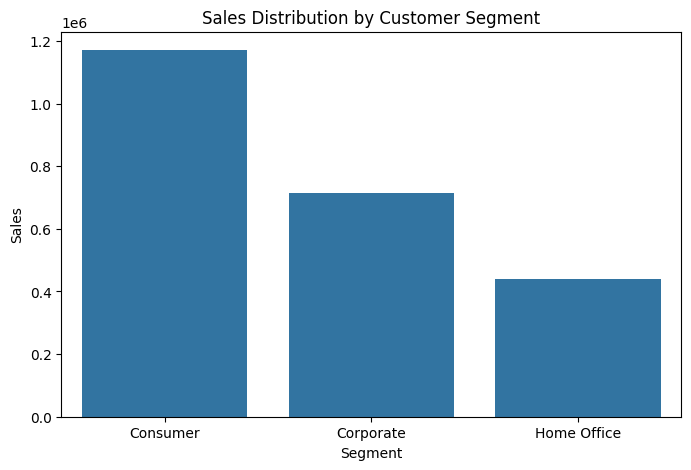

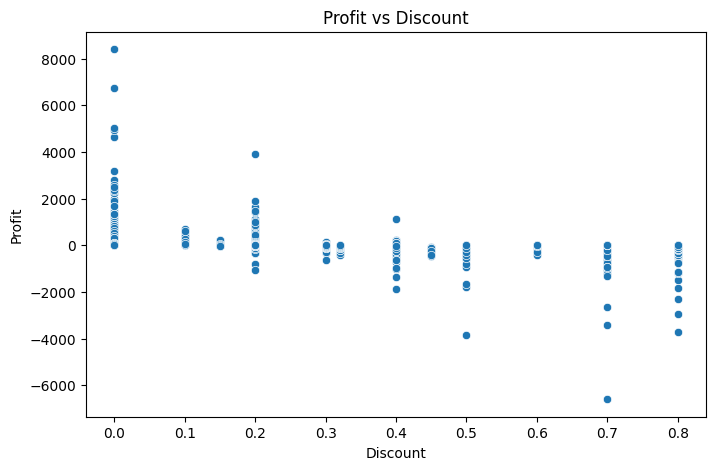

In [20]:
# Sales by customer segment
sales_by_segment = sales_data.groupby('Segment')['Sales'].sum().reset_index()

# Plot sales by customer segment
plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='Sales', data=sales_by_segment)
plt.title('Sales Distribution by Customer Segment')
plt.show()

# Profit vs Discount analysis (if you want to examine customer behavior)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Discount', y='Profit', data=sales_data)
plt.title('Profit vs Discount')
plt.show()


# ***Data Visualization***

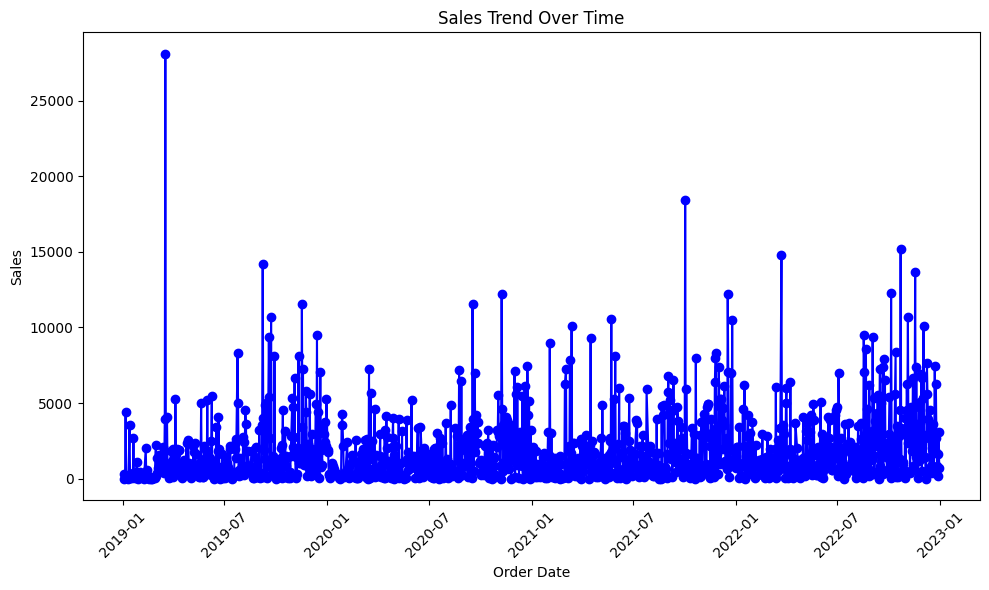

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the cleaned sales data
sales_data = pd.read_excel('Cleaned_SalesData.xlsx')

# Convert 'Order Date' to datetime if not already
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Group sales by order date
sales_trend = sales_data.groupby('Order Date')['Sales'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(10,6))
plt.plot(sales_trend['Order Date'], sales_trend['Sales'], color='blue', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


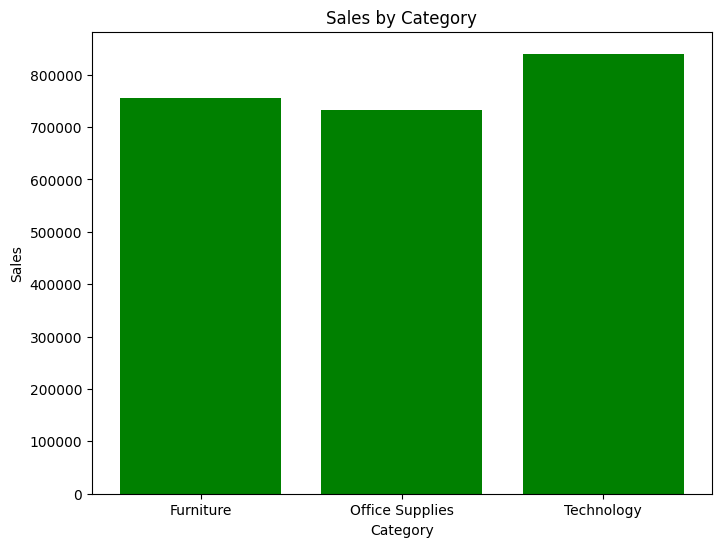

In [22]:
# Group sales by Category
top_categories = sales_data.groupby('Category')['Sales'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(8,6))
plt.bar(top_categories['Category'], top_categories['Sales'], color='green')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


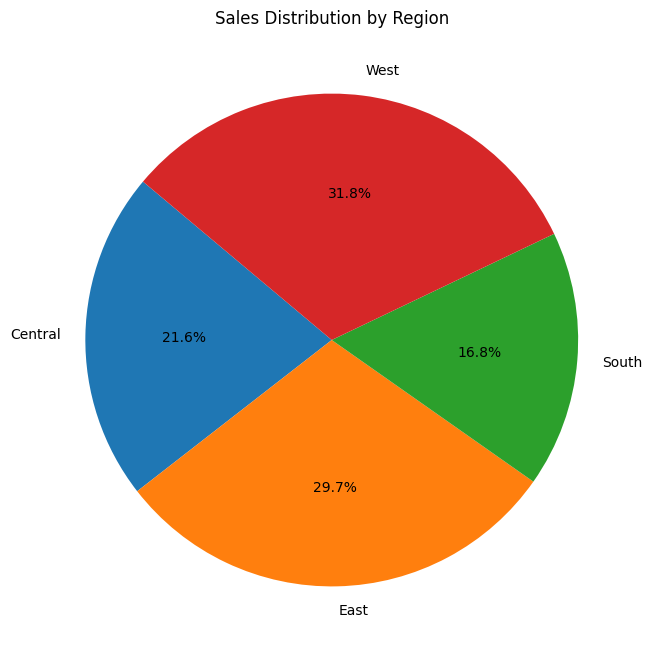

In [23]:
# Group sales by Region
region_sales = sales_data.groupby('Region')['Sales'].sum()

# Plot the pie chart
plt.figure(figsize=(8,8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Region')
plt.show()


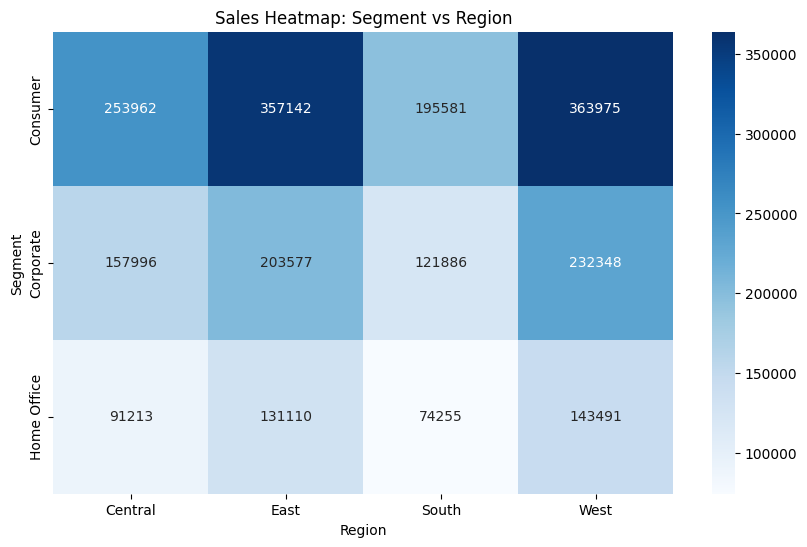

In [24]:
import seaborn as sns

# Pivot the data to create a heatmap (assuming Segment and Region)
segment_region_sales = sales_data.pivot_table(values='Sales', index='Segment', columns='Region', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(segment_region_sales, annot=True, fmt=".0f", cmap="Blues")
plt.title('Sales Heatmap: Segment vs Region')
plt.show()


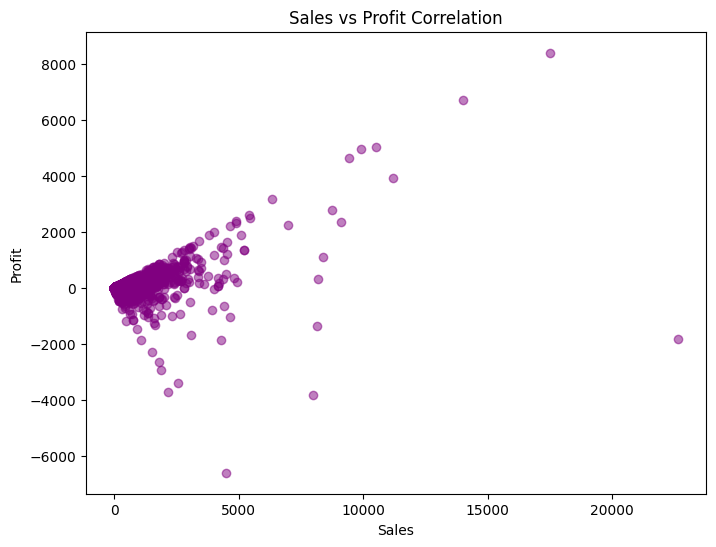

In [25]:
# Scatter plot for Sales vs Profit
plt.figure(figsize=(8,6))
plt.scatter(sales_data['Sales'], sales_data['Profit'], alpha=0.5, color='purple')
plt.title('Sales vs Profit Correlation')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()
